## Before submitting
1. Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

2. Make sure that no assertions fail or exceptions occur, otherwise points will be subtracted.

3. Please submit only the `*.ipynb` file.

4. Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". Edit only between `YOUR CODE HERE` and `END YOUR CODE`.

5. Make sure to use Python 3, not Python 2.

Fill your group name and collaborators below:

In [ ]:
GROUPNAME = "Gruppe 12"
COLLABORATORS = "384377, 408340, 407886"

---

# Exercise Sheet 4: Sampling, Simulation

In this exercise sheet, we will simulate a Markov chain. In the first part, we will consider a pure Python based implementation where a single particle jumps from one position to another of the lattice, where all transitions to neighboring states have the same probability. Then, we will add probabilities for the transitions. Finally, the implementation will be parallelized to run many chains in parallel.

Keep in mind that you can get the documentation of modules and functions using the `help()` function.

In [37]:
%matplotlib inline

## Exercise 1: Random moves in a lattice (20 P)

In this exercise, we will simulate the propagation of particles in a graph composed of 8 states (denoted by letters A-H) and stored in the variable `S` defined in the cell below. The lattice is the following:

![](lattice.png)

The particle starts in state `A` and then jumps randomly from its current state to one of its neighbors, all with same probability. Note that it cannot stay at the current position. The dictionary `T` defined in the cell below encode such transition behavior.

In [121]:
# List of states
S = list('ABCDEFGH')

# Dictionary of transitions
T = {'A': 'BE', 'B': 'AFC', 'C': 'BGD', 'D': 'CH', 'E': 'AF', 'F': 'EBG', 'G': 'FCH', 'H': 'GD'}
print("States: {}".format(S))
print("Transitions: {}".format(T))

States: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
Transitions: {'A': 'BE', 'B': 'AFC', 'C': 'BGD', 'D': 'CH', 'E': 'AF', 'F': 'EBG', 'G': 'FCH', 'H': 'GD'}


Using pure Python, simulate the experiment and run it for 1999 iterations starting in state `A`. Return the sequence of states visited by the particle as a list. Set the random seed of the module `random` to value `123` using the function `random.seed` before starting the simulation in order to produce deterministic results.

In [112]:
def simulate(transitions):
    # >>>>> YOUR CODE HERE
    import random
    random.seed(123)
    state_sequence = list()
    
    curr = 'A'
    for i in range(1999):
        state_sequence.append(curr)
        neighbours = transitions.get(curr)
        curr=(random.choice(neighbours))
        
    # <<<<< END YOUR CODE
    return state_sequence

In [113]:
# Tests
X = simulate(T)

# Print the first 10 states
print(X[:10])
assert type(X) == list
assert type(X[0]) == str


['A', 'B', 'F', 'E', 'F', 'B', 'A', 'B', 'F', 'G']


Implement a function that returns a list of the relative frequencies of each state.

In [174]:
# Histogram of states in a given sequence
def compute_histogram(state_sequence):
    # >>>>> YOUR CODE HERE
    histogram=list()
    for char in sorted(set(state_sequence)): 
        histogram.append((state_sequence.count(char))/1999)

    # <<<<< END YOUR CODE
    return histogram

In [175]:
h = compute_histogram(X)
assert type(h) == list

# Check if the histogram is a valid probability distribution
import numpy
assert numpy.sum(h) == 1.0


Using the above `compute_histogram` function, produce a bar plot sing `matplotlib` (`matplotlib.pyplot.bar`) showing the fraction of the time the particle is found in a given state, averaged over the whole simulation. 

In [176]:
import matplotlib.pyplot as plt
import numpy

In [177]:
def plot_histogram(histogram):
    # >>>>> YOUR CODE HERE
    plt.bar(S, height=histogram)
    plt.xlabel('State')
    plt.ylabel('% of time')
    # <<<<< END YOUR CODE
    return

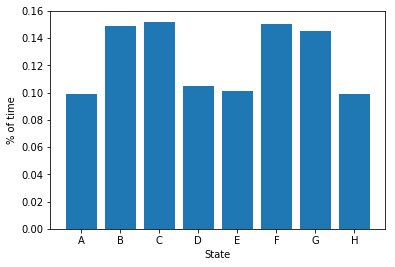

In [178]:
# Plot the histogram of the above defined sequence X
h = compute_histogram(X)
plot_histogram(h)

## Exercise 2: Adding a special state (20 P)

Suppose now that the rule (defined by the transition dictionary) is modified such that everytime the particle is in state `F`, it always moves to `E` in the next step.

* Modify the code to handle this special case, and create a bar plot for the new states distribution. Make sure to not modify the original transition dictionary. To achieve this, you can have a look at the `copy` module, but every working solution is accepted.

In [156]:
def modify_transitions(transitions):
    # >>>>> YOUR CODE HERE
    import copy
    new_transitions = copy.deepcopy(transitions)
    new_transitions.update({'F':'E'})
    # <<<<< END YOUR CODE
    return new_transitions

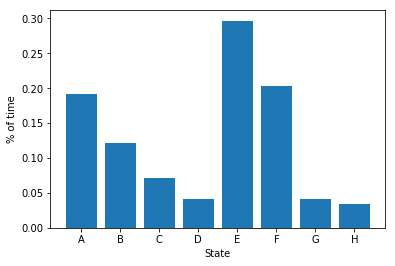

In [157]:
new_T = modify_transitions(T)
new_X = simulate(new_T)
h = compute_histogram(new_X)
plot_histogram(h)

In [158]:
# Tests
new_T = modify_transitions(T)
print(T)
print(new_T)
assert type(new_T) == dict
assert new_T['F'] == 'E'

{'A': 'BE', 'B': 'AFC', 'C': 'BGD', 'D': 'CH', 'E': 'AF', 'F': 'EBG', 'G': 'FCH', 'H': 'GD'}
{'A': 'BE', 'B': 'AFC', 'C': 'BGD', 'D': 'CH', 'E': 'AF', 'F': 'E', 'G': 'FCH', 'H': 'GD'}


## Exercise 3: Exact solution to the previous exercise (20 P)

For simple Markov chains, a number of statistics can be obtained analytically from the structure of the transition model, in particular, by analysis of the transition matrix.

* Compute the transition matrices associated to the models of exercise 1 and 2 (make sure that each row in these matrices sums to 1).
* Give the transition matrices as argument to the function `utils.getstationary(P)` and return their result.

This last function computes in closed form the stationary distribution associated to a given transition matrix `P` (i.e. the one we would get if running the simulation with such transition matrix for infinitely many time steps and looking at state frequencies).

In [324]:
def to_matrix(transition):
    # >>>>> YOUR CODE HERE
    keys = sorted(transition.keys())

    n = len(keys)
    M = [[0]*n for _ in range(n)]
    # Gets matrix of ones
    for key in keys:
        denom = len(transition.get(key))
        for value in transition.get(key):
#             print(key+"="+str(keys.index(key))+" " +value+"="+str(keys.index(value)))
            M[keys.index(key)][keys.index(value)] += 1/denom
    
    M = numpy.array(M)
    matrix = M.reshape(n,n)
    # <<<<< END YOUR CODE
    return matrix

In [325]:
def get_stationary(matrix):
    import utils
    # >>>>> YOUR CODE HERE
    stationary_distribution=utils.getstationary(matrix)
    # <<<<< END YOUR CODE
    return stationary_distribution

In [326]:
# Tests
matrix_T = to_matrix(T)
import numpy
print(numpy.round(matrix_T, 2))
assert type(matrix_T) == numpy.ndarray
assert numpy.sum(matrix_T, axis=1).all() == 1.0
print(numpy.round(get_stationary(matrix_T), 3))

[[0.   0.5  0.   0.   0.5  0.   0.   0.  ]
 [0.33 0.   0.33 0.   0.   0.33 0.   0.  ]
 [0.   0.33 0.   0.33 0.   0.   0.33 0.  ]
 [0.   0.   0.5  0.   0.   0.   0.   0.5 ]
 [0.5  0.   0.   0.   0.   0.5  0.   0.  ]
 [0.   0.33 0.   0.   0.33 0.   0.33 0.  ]
 [0.   0.   0.33 0.   0.   0.33 0.   0.33]
 [0.   0.   0.   0.5  0.   0.   0.5  0.  ]]
[0.1  0.15 0.15 0.1  0.1  0.15 0.15 0.1 ]


## Exercise 4: Adding non-uniform transition probabilities (20 P)

We consider the original lattice defined by the variable `T`. We set transition probabilities for each state to be such that:

1. The probability of moving vertically is the same as the probability of moving horizontally for states that have only two connections.
2. For states with 3 connections the probability of moving vertically is 0.5 while the probability of moving left is always twice the probability of moving right.


Build the transition matrix `P` implementing the described behavior and compute its stationary distribution using the function `utils.getstationary(P)`.

(Hints: You can notice that for each state, the transitions towards other states are always listed from left to right in the dictionary `T`. Also note that characters A-H can be mapped to integer values using the Python function ord(), thus, giving a direct relation between state names and indices of the transition matrix.)

In [341]:
def build_transition_matrix():
    # >>>>> YOUR CODE HERE
    keys = sorted(T.keys())

    n = len(keys)
    M = [[0]*n for _ in range(n)]
    for key in keys:
        denom = len(T.get(key))
#         print(denom)
        
#             print(key+"="+str(keys.index(key))+" " +value+"="+str(keys.index(value)))
        if (denom == 2):
            for value in T.get(key):
                M[keys.index(key)][keys.index(value)] += 1/denom
        else : #(denom ==3)
            M[keys.index(key)][keys.index(T.get(key)[0])] =0.5*2/3
            M[keys.index(key)][keys.index(T.get(key)[1])] =0.5
            M[keys.index(key)][keys.index(T.get(key)[2])] =0.5*1/3
#                 print(keys[keys.index(T.get(key)[i])])

    
    M = numpy.array(M)
    transition_matrix = M.reshape(n,n)
    # <<<<< END YOUR CODE
    return transition_matrix

In [347]:
# >>>>> YOUR CODE HERE
import utils
print(utils.getstationary(build_transition_matrix()))
# <<<<< END YOUR CODE

[0.14285714 0.21428571 0.10714286 0.03571429 0.14285714 0.21428571
 0.10714286 0.03571429]


In [363]:
# Tests
P = build_transition_matrix()
print(numpy.round(P, 2))
assert type(P) == numpy.ndarray
assert (numpy.sum(matrix_T, axis=1) == 1.0).all()

[[0.   0.5  0.   0.   0.5  0.   0.   0.  ]
 [0.33 0.   0.17 0.   0.   0.5  0.   0.  ]
 [0.   0.33 0.   0.17 0.   0.   0.5  0.  ]
 [0.   0.   0.5  0.   0.   0.   0.   0.5 ]
 [0.5  0.   0.   0.   0.   0.5  0.   0.  ]
 [0.   0.5  0.   0.   0.33 0.   0.17 0.  ]
 [0.   0.   0.5  0.   0.   0.33 0.   0.17]
 [0.   0.   0.   0.5  0.   0.   0.5  0.  ]]


## Exercise 5: Simulation for multiple particles (20 P)

We let 1000 particles evolve simultaneously in the system described in Exercise 4. The initial state of these particles is pseudo-random and given by the function `utils.getinitialstate()`.

* Using the function `utils.mcstep()` that was introduced during the lecture, simulate this system for 500 time steps.
* Estimate the stationary distribution by looking at the distribution of these particles in state space after 500 time steps.

For reproducibility, give seed values to the function utils.mcstep corresponding to the current time step of the simulation (i.e. from 0 to 499).

In [526]:
def simulate_1000():
    # >>>>> YOUR CODE HERE
    
    pad_shape = ((0, 0), (1, 0))  # ((before_1, after_1), (before_2, after_2))
    Pad = numpy.pad(P, pad_shape, mode='constant')
    
    X=utils.getinitialstate()
    
    num_steps = 500
    for i in range(0,num_steps):
        X=utils.mcstep(X,Pad,numpy.random.seed(i))
#     print(X[0])
    
    estimated_stationary_distribution=X.mean(axis=0)
    # <<<<< END YOUR CODE
    return estimated_stationary_distribution

In [527]:
# Tests
stationary_distribution = simulate_1000()
print(stationary_distribution)
import numpy
assert numpy.sum(stationary_distribution) == 1

[0. 0. 0. 0. 1. 0. 0. 0.]
[0.148 0.229 0.099 0.028 0.119 0.215 0.127 0.035]


In [358]:
# 